# Анализ данных | Python 
## ОП «Журналистика», ОП «Медиакоммуникации» 2022/23

## Семинар 5 

## Меры центральной тенденции. Меры разброса.

*Автор: Татьяна Рогович*

In [2]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')

Для количественных данных удобнее смотреть минимальные/максимальные/средние значения:

In [3]:
print(data['Age'].min()) 
print(data['Age'].max()) 
print(data['Age'].mean())

0.42
80.0
29.69911764705882


В Pandas есть функция `.describe()`, которая делает удобную сводную таблицу по всем количественным столбцам сразу (обратите внимание, что для Pandas количественные данные = все, что представлено числами, что, разумеется, неверно в общем случае):

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data[['Age', 'Fare']].describe() # также можно применять только к отдельным колонкам


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200




**Меры центральной тенденции**

Меры среднего уровня дают усредненную характеристику совокупности объектов по определенному признаку.

В зависимости от типа шкалы измерения применяются следующие меры среднего уровня:
- для количественных данных - среднее значение (арифметическое среднее), медиана, мода

- для категориальных:

   для порядковых данных - медиана, мода

   для номинальных данных - мода

На самом деле таких мер довольно много, например: взвешенное среднее — среднее значение, учитывающее весовые коэффициенты для каждого значения, гармоническое среднее — количество наблюдений, деленное на сумму инвертированных значений наблюдений, и так далее.

**Среднее значение (математическое ожидание)**

*Математическое ожидание* вычисляется по формуле:

$$
 {\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {1}{n}}(x_{1}+\ldots +x_{n})} 
 $$

In [6]:
data['Age'].mean()

29.69911764705882

**Немного усложним задачу**

In [7]:
data[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**Медиана**

Если $x_1, x_2, ..., x_n$ – упорядоченные по возрастанию или убыванию числовые значения рассматриваемого признака, 
$n$ – объем выборки, то *медиана* - это средний элемент для нечетного  $n$ и полуcумма средних элементов для четного  $n$.

Для порядковой шкалы медиана является такой точкой на шкале, которая делит всю совокупность опрошенных на две равных части — тех, кто отметил градации меньше этой точки (либо равные ей), и тех, кто отметил градации больше этой точки.


In [8]:
data['Age'].median()

28.0

**Мода**

Мода - значение во множестве наблюдений, которое встречается наиболее часто.

In [9]:
data.Pclass.mode()

0    3
Name: Pclass, dtype: int64

In [10]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Квартили**

Квартиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квартиль называется процентилем или перцентилем.

Например, фраза «для развитых стран 99-процентиль продолжительности жизни составляет 100 лет» означает, что ожидается, что 99 % людей проживут не более, чем 100 лет.

Относительно нашего датасета фраза "75%-перцентиль возраста пассажиров Титаника равна 38 лет" означает, что 75% пассажиров были не старше 38 лет.


In [11]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Квартили используем для рассчета межквартильного размаха, который помогает с поиском выбросов в данных:

In [12]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1
print(q1, q3, iqr)

20.125 38.0 17.875


In [13]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-6.6875
64.8125


In [14]:
for i in data.index:
    if data.iloc[i]['Age'] > iqr_outlier_threshold_up:
        print(data.iloc[i]['Age'], data.iloc[i]['Sex'])

66.0 male
65.0 male
71.0 male
70.5 male
65.0 male
65.0 male
71.0 male
80.0 male
70.0 male
70.0 male
74.0 male


<AxesSubplot:xlabel='Age', ylabel='Sex'>

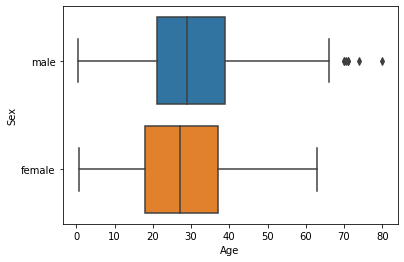

In [15]:
import seaborn as sns # сегодня впервые видим эту библиотеку, но позже рассмотрим ее подробнее
sns.boxplot(x=data['Age'], y=data['Sex'])